<a href="https://colab.research.google.com/github/bcolorado/ML-course/blob/main/isi_practica4_5_bcolorado_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bryan Smith Colorado Lopez

 1. Prepare los datos.

 a) Cargue los datos usando Pandas.



In [ ]:
import numpy as np
import pandas as pd
import sklearn

file_path = 'titanic.csv'

# Cargar el archivo CSV en un DataFrame de pandas
titanic_data = pd.read_csv(file_path)


  b) Selecciones las siguientes caracterısticas del dataset: Survived, Pclass, Sex, Age, SibSp,
 Parch, Fare, Embarked.

  c) Imprima las primeras filas del dataframe es inspeccione los datos. Que variables son
 categoricas y cuales son numericas?


# Variables categóricas:

* **Survived:** Indica si el pasajero sobrevivió o no al desastre del Titanic. Es una variable categórica binaria con valores 0 (no sobrevivió) y 1 (sobrevivió).

* **Pclass:** Representa la clase del pasajero en el Titanic. Es una variable categórica ordinal con valores 1, 2 y 3.

* **Sex:** Representa el género del pasajero. Es una variable categórica nominal con valores 'male' y 'female'.

* **Embarked:** Indica el puerto de embarque del pasajero. Es una variable categórica nominal con valores 'S', 'C' y 'Q'.

# Variables numéricas:

* **Age:** Representa la edad del pasajero. Es una variable numérica continua.

* **SibSp:** Indica el número de hermanos/cónyuges a bordo del Titanic para cada pasajero. Es una variable numérica discreta.

* **Parch:** Indica el número de padres/hijos a bordo del Titanic para cada pasajero. Es una variable numérica discreta.

* **Fare:** Representa el precio del boleto pagado por el pasajero. Es una variable numérica continua.

In [ ]:
# Seleccionar las características requeridas del DataFrame
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
selected_data = titanic_data.loc[:, selected_features]

# Imprimir las primeras filas del nuevo DataFrame
selected_data.head(10)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


 d) Verifique cuantos datos faltantes hay usando las funciones isnull and sum de Pandas

In [ ]:
# Verificar datos faltantes en el DataFrame
missing_data = selected_data.isnull().sum()

# Mostrar la cantidad de datos faltantes por columna
print(missing_data)


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


e) Utilice la funcion fillna de Pandas para manejar valores faltantes, use la mediana o la
 moda segun aplique.

In [ ]:
# Calcular la mediana para columnas numéricas y la moda para columnas categóricas
median_age = selected_data['Age'].median()
mode_embarked = selected_data['Embarked'].mode()[0]

# Rellenar los valores faltantes con la mediana o la moda según corresponda
selected_data['Age'].fillna(median_age, inplace=True)
selected_data['Embarked'].fillna(mode_embarked, inplace=True)

# Imprimir las primeras filas del nuevo DataFrame
selected_data.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


 f ) Convierta las columnas con valores categ´oricos a valores num´ericos usando la funci´on
 get dummies de Pandas.

In [ ]:
categoric_selected_data = selected_data.copy()

# Convertir columnas categóricas a valores numéricos utilizando get_dummies
categoric_selected_data = pd.get_dummies(selected_data, columns=['Sex', 'Embarked'])

# Imprimir las primeras filas del nuevo DataFrame
categoric_selected_data.head(10)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,1,0,0


 g) Cree dos dataframes X y y para los datos de entrada y la variable de clase (Survived)

In [ ]:
# DataFrame X con datos de entrada (características)
X = categoric_selected_data.drop('Survived', axis=1)

# DataFrame y con la variable de clase (Survived)
y = categoric_selected_data['Survived']

X.head(10)


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,28.0,0,0,8.4583,0,1,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
8,3,27.0,0,2,11.1333,1,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0


In [ ]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

 2. Entrene un modelo de clasificacion basado en arboles de decision.

 a) Haga una particion del conjunto de datos, usando muestreo estratificado, en 70% para
 entrenamiento y 30% para test.

X son los datos de entrada.

y es la variable de clase.

test_size=0.3 indica que el 30% de los datos se usarán para pruebas.

stratify=y garantiza que la división mantenga la misma proporción de clases que el conjunto de datos original.

random_state=42 se utiliza para garantizar reproducibilidad, fijando la semilla aleatoria.

In [ ]:
from sklearn.model_selection import train_test_split

# Realizar la partición del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


 b) Entrene el modelo

 c) Aplique el modelo al conjunto de test

 d) Mida el desempeno del modelo calculando exactitud, error de clasificacion, precision,
 recall y matriz de confusion.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Aplicar el modelo al conjunto de prueba
y_pred = model.predict(X_test)

# Medir el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
classification_error = error
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Error:", classification_error)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7611940298507462
Classification Error: 0.23880597014925375
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       165
           1       0.71      0.64      0.67       103

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268

Confusion Matrix:
 [[138  27]
 [ 37  66]]


3. Interprete el modelo obtenido:

 a) Grafique el arbol obtenido

 b) Cual el el atributo mas discriminante? Tiene sentido? De una explicacion a partir del
 conocimiento del problema.

 Se identifica el índice de la característica con la importancia más alta y se imprime el nombre de esa característica. Esta característica será la más discriminante según el modelo
 . Sin embargo, en general, el atributo más discriminante será aquel que tiene un mayor impacto en las decisiones de clasificación del modelo.







In [ ]:
pip install graphviz

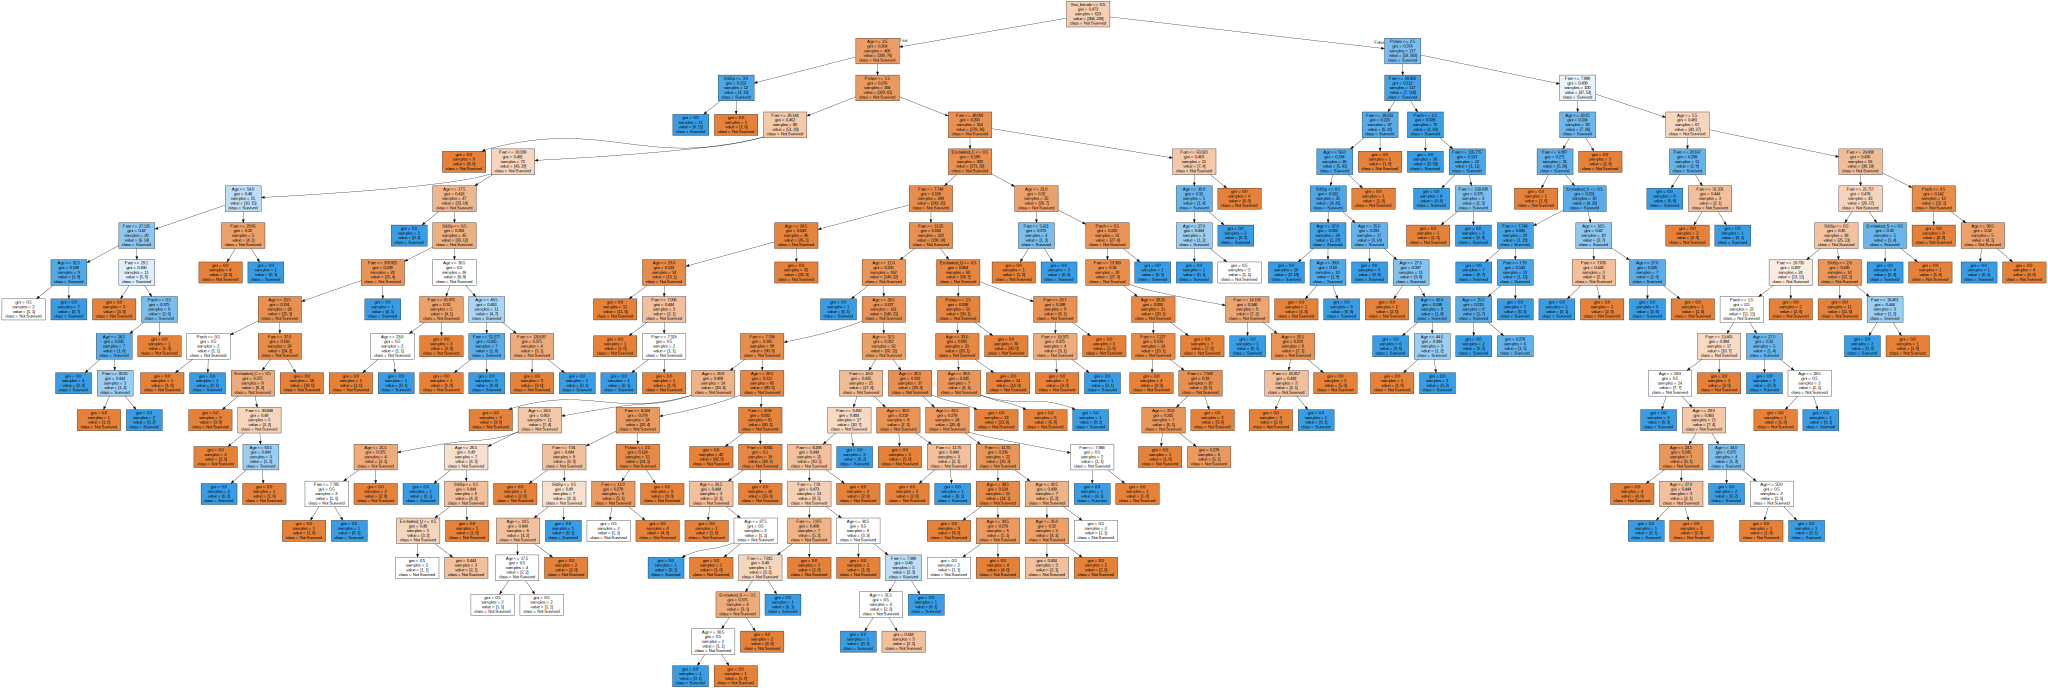

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol como un archivo DOT
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=['Not Survived', 'Survived'],
                           filled=True)

# Generar el gráfico del árbol desde el archivo DOT
graph = graphviz.Source(dot_data)

# Guardar el gráfico del árbol como una imagen PNG
graph.render("titanic_tree")

# Mostrar el gráfico del árbol
graph



In [ ]:
# Identificar el atributo más discriminante
feature_importance = model.feature_importances_
most_discriminant_attribute_index = feature_importance.argmax()
most_discriminant_attribute = X.columns[most_discriminant_attribute_index]

print("El atributo más discriminante es:", most_discriminant_attribute)

El atributo más discriminante es: Sex_female


 4. Grafique curvas de aprendizaje

 a) Grafique la exactitud (accuracy) del modelo en el conjunto de entrenamiento y el con
junto de prueba para diferentes proporciones de datos de entrenamiento y prueba.

 b) Analice los resultados.

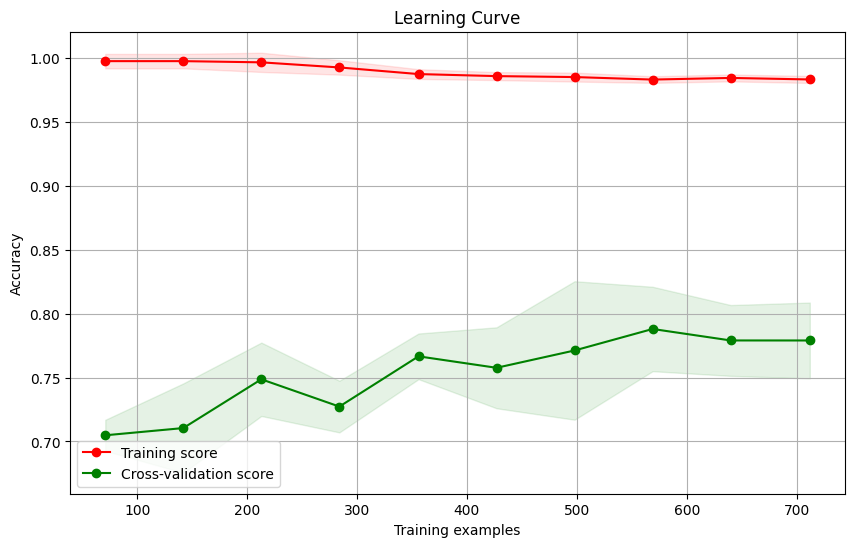

In [ ]:
from sklearn.model_selection import learning_curve

# Definir función para graficar curvas de aprendizaje
def plot_learning_curve(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Definir diferentes proporciones de datos de entrenamiento y prueba
train_sizes = np.linspace(0.1, 1.0, 10)

# Graficar curvas de aprendizaje
plot_learning_curve(model, X, y, train_sizes, cv=5)


Se calculan las puntuaciones de entrenamiento y prueba para diferentes tamaños de conjunto de entrenamiento.

Luego, se calculan las medias y desviaciones estándar de estas puntuaciones y se grafican las curvas de aprendizaje.
Las áreas sombreadas alrededor de las curvas representan la varianza de las puntuaciones.

Una brecha estrecha entre las curvas de entrenamiento y validación sugiere un bajo sobreajuste, mientras que una brecha amplia indica un alto sobreajuste.
